In [1]:
import seaborn as sns

import TrainModel
import EDA_utils

%matplotlib inline

** Загрузим данные **

In [2]:
tm = TrainModel.TrainModel()
data = tm.load_data(path = 'data/data.xlsx')

Input data shape:  (569, 31)


In [3]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


** Посмотрим на соотношение классов **

Train data  diagnosis  value counts:
0    357
1    212
Name: diagnosis, dtype: int64


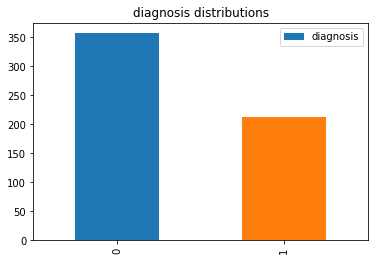

In [4]:
EDA_utils.GetTrainDiagnosisDistributions(data, 'diagnosis')

** Посмотрим, нет ли пропусков в данных **

In [5]:
EDA_utils.CheckForNulls(data)

Null's was not found in data.


** Выведем пары наиболее сильно коррелированных друг с другом признаков. При построении модели имеет смысл избавиться от лишних переменных **

In [10]:
EDA_utils.FindHighlyCorrelatedFeatures(data, n=40)

Top-40 highly correlated feature pairs:
radius_mean          perimeter_mean             0.997855
radius_worst         perimeter_worst            0.993708
radius_mean          area_mean                  0.987357
perimeter_mean       area_mean                  0.986507
radius_worst         area_worst                 0.984015
perimeter_worst      area_worst                 0.977578
radius_se            perimeter_se               0.972794
perimeter_mean       perimeter_worst            0.970387
radius_mean          radius_worst               0.969539
perimeter_mean       radius_worst               0.969476
radius_mean          perimeter_worst            0.965137
area_mean            radius_worst               0.962746
                     area_worst                 0.959213
                     perimeter_worst            0.959120
radius_se            area_se                    0.951830
perimeter_mean       area_worst                 0.941550
radius_mean          area_worst                 

** Поскольку целевая переменная бинарная, а все признаки - вещественные числа, считать корреляции Пирсона или Спирмена между целевой переменной и признаками бессмысленно. Но мы можем посчитать разницу матожиданий признаков для двух значений целевой переменной или посмотреть на boxplot'ы **

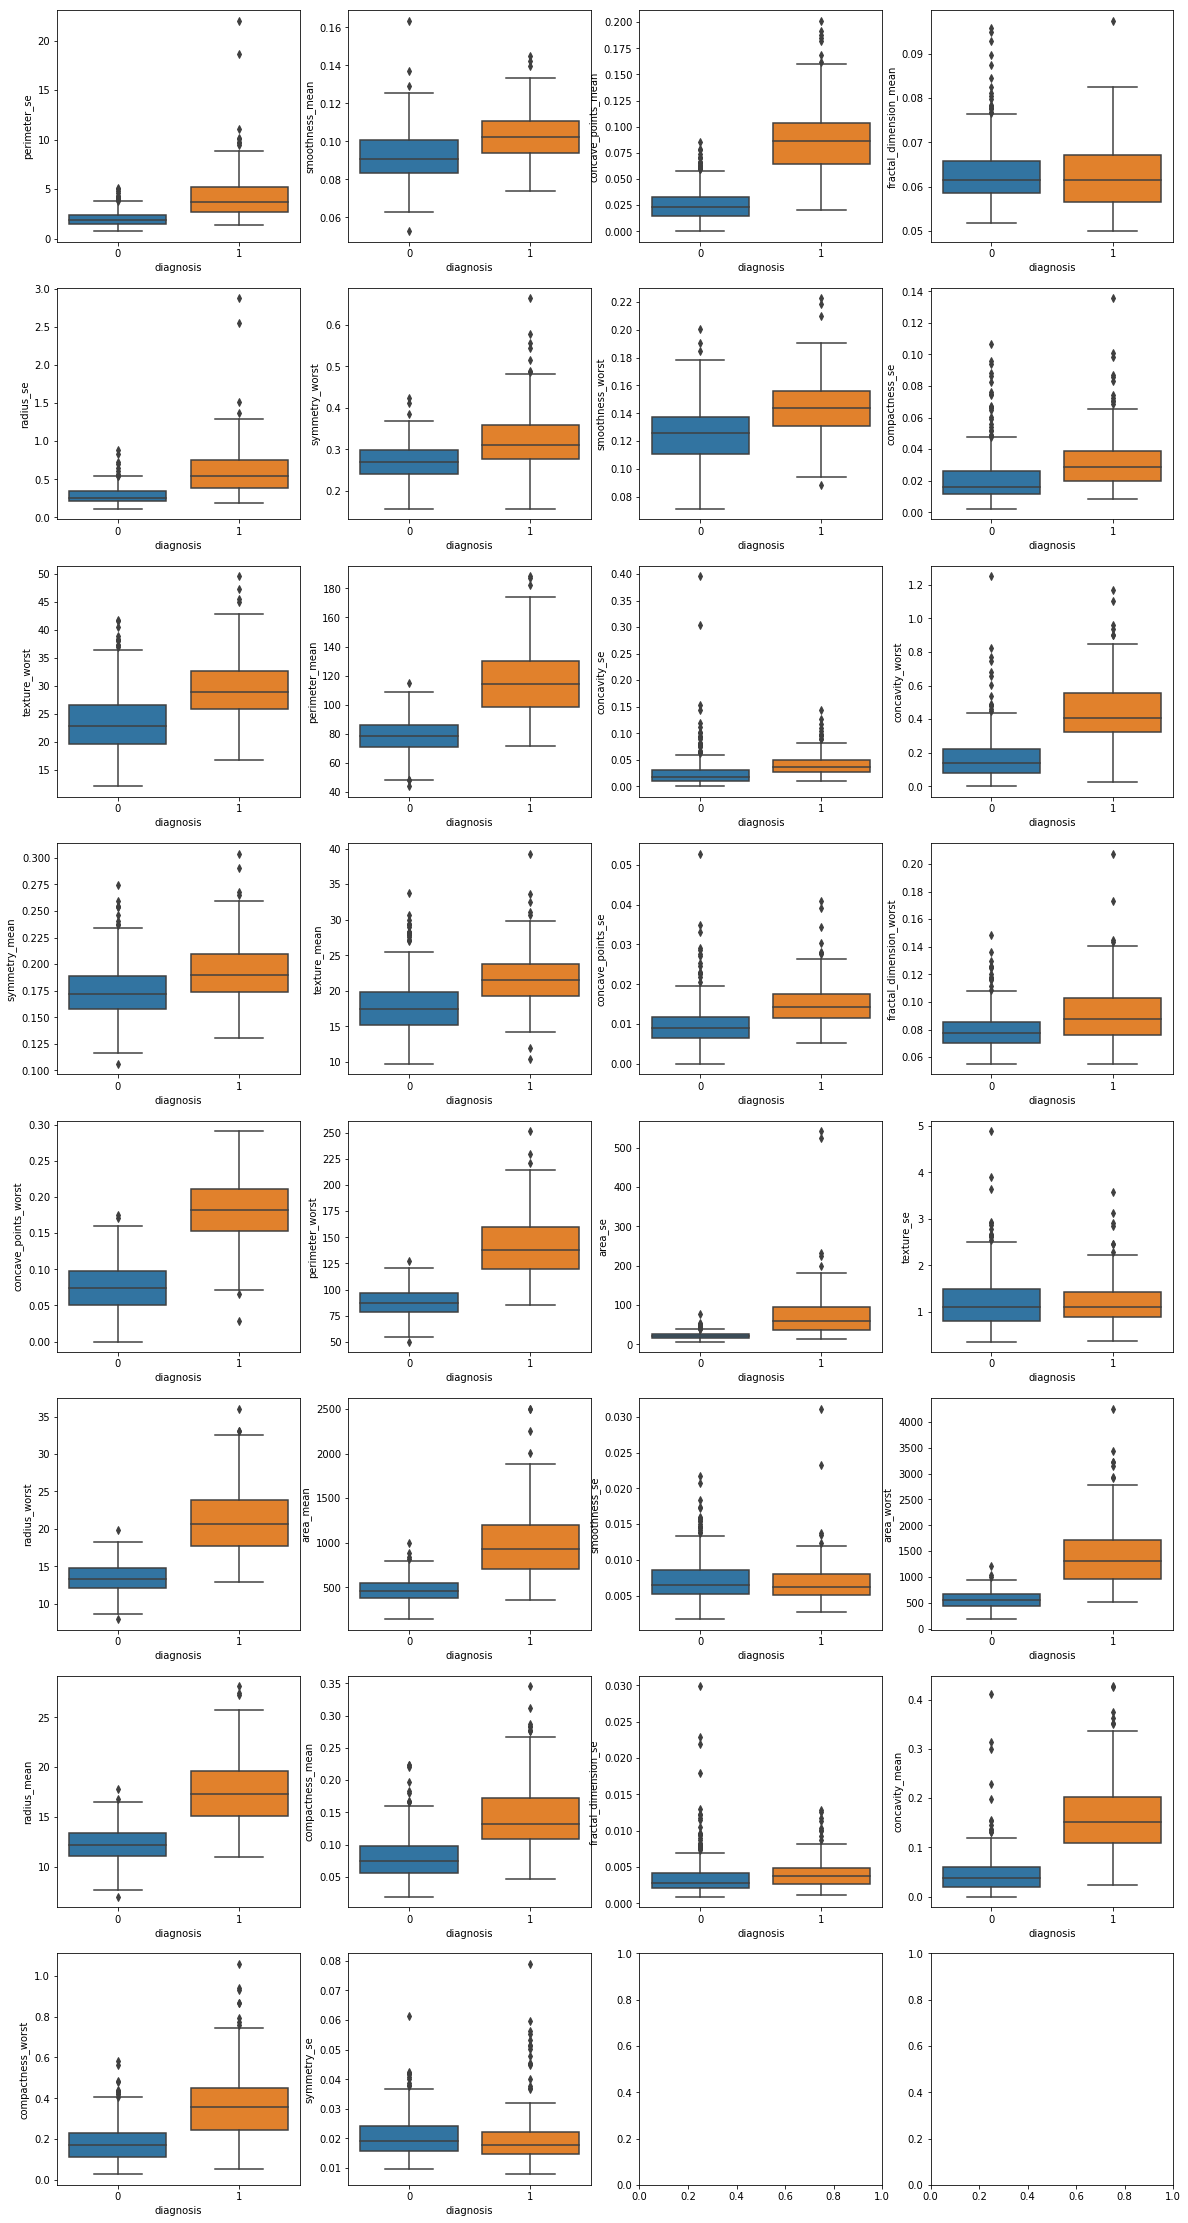

In [7]:
EDA_utils.DrawBoxPlotsByDiagnosis(data, 'diagnosis', 4)

Можно выделить признаки, у которых большие различия распределений при разных значениях целевой переменной. Например, **concave_points_worst**, **area_mean** и другие. Это позволяет надеяться, что удастся построить неплохой классификатор.

## Другие визуализации

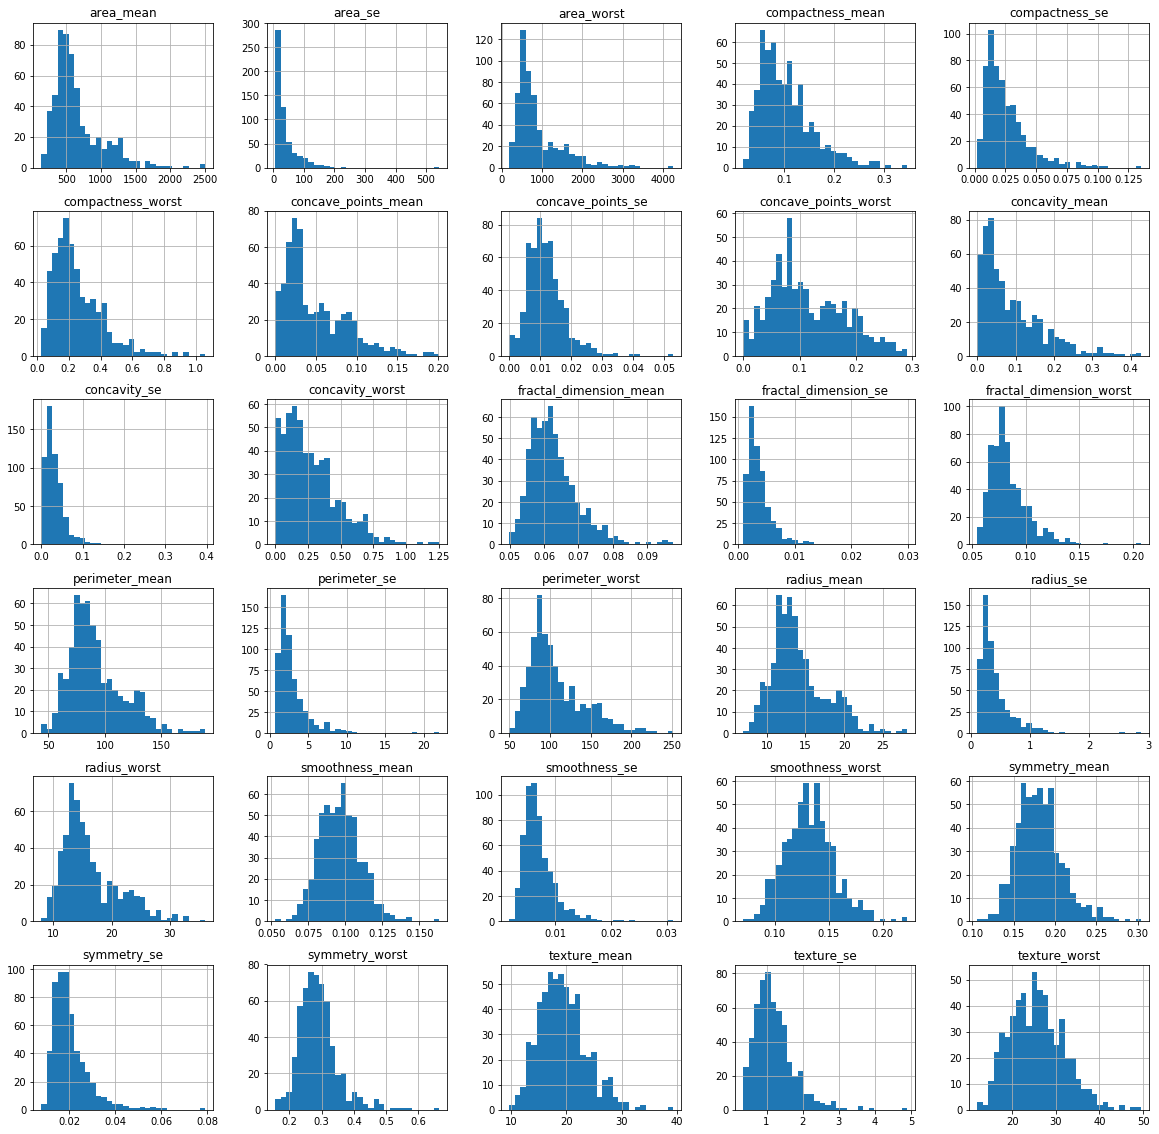

In [8]:
# Распределения признаков
features = list(set(data.columns)-set(['diagnosis']))
data[features].hist(figsize=(20,20), bins=30);

Распределения многих признаков не очень похожи на нормальные. При построении моделей стоит попробовать применить к ним предварительные преобразования, чтобы улучшить характеристики распределений.

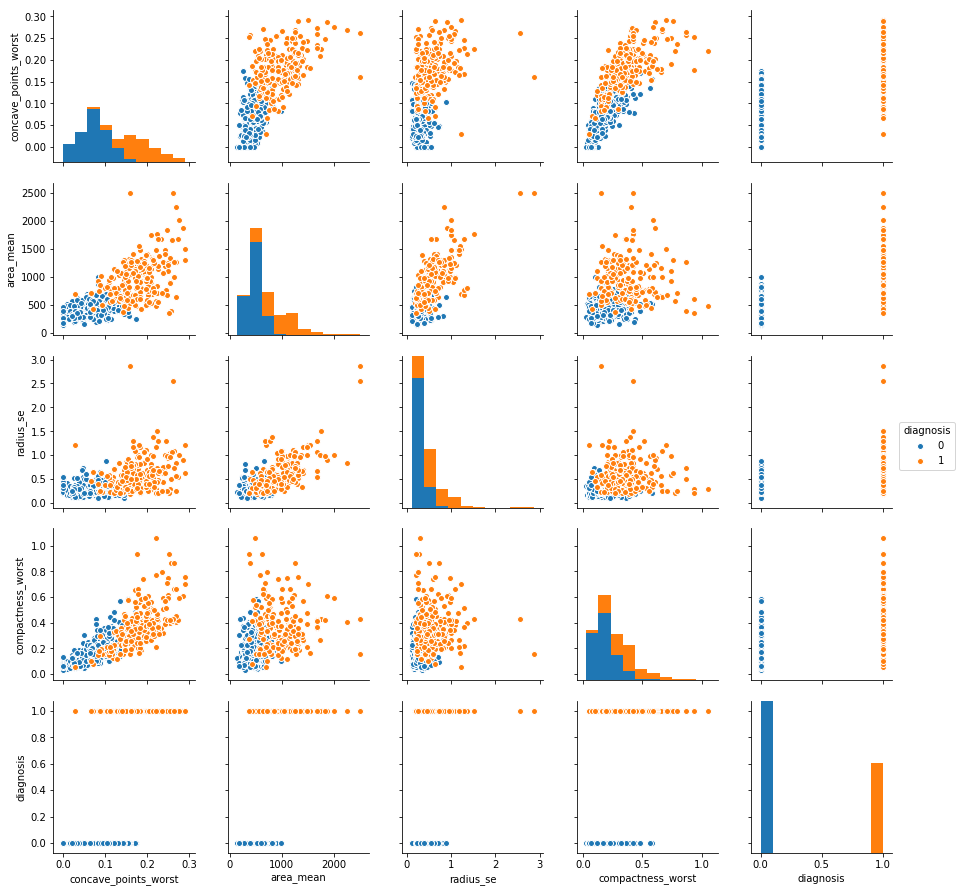

In [9]:
# Взаимоотношения признаков при разных значениях целевой переменной
features = ['concave_points_worst', 'area_mean', 'radius_se', 'compactness_worst']
sns.pairplot(data[features + ['diagnosis']], hue='diagnosis');